# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [43]:
import pandas as pd 
import numpy as np

paysim1 = pd.read_csv('../PS_20174392719_1491204439457_log.csv', nrows=100000)


In [11]:
# use first a smaller sample to reduce computation times
paysim1 = paysim1.sample(n = 10000)

In [44]:
paysim1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 7.2+ MB


In [45]:
paysim1.describe()

step        amount  ...        isFraud  isFlaggedFraud
count  100000.000000  1.000000e+05  ...  100000.000000        100000.0
mean        8.499640  1.736022e+05  ...       0.001160             0.0
std         1.825545  3.443003e+05  ...       0.034039             0.0
min         1.000000  3.200000e-01  ...       0.000000             0.0
25%         8.000000  9.963562e+03  ...       0.000000             0.0
50%         9.000000  5.274552e+04  ...       0.000000             0.0
75%        10.000000  2.117631e+05  ...       0.000000             0.0
max        10.000000  1.000000e+07  ...       1.000000             0.0

[8 rows x 8 columns]

In [46]:
paysim1.head(5)

step      type    amount  ... newbalanceDest  isFraud  isFlaggedFraud
0     1   PAYMENT   9839.64  ...            0.0        0               0
1     1   PAYMENT   1864.28  ...            0.0        0               0
2     1  TRANSFER    181.00  ...            0.0        1               0
3     1  CASH_OUT    181.00  ...            0.0        1               0
4     1   PAYMENT  11668.14  ...            0.0        0               0

[5 rows x 11 columns]

In [47]:
for col in paysim1.columns:
    print(len(paysim1[col].unique()))

# step and type have low cardinality (10 and 5 respectively)
# isFlaggedFraud is empty (all zeros)
# isFraud is our target
# nameOrig is unique for each row, so it's not useful for our model
# nameDest also has cardinality way too big to be useful


10
5
99470
100000
58013
48118
51551
53663
19158
2
1


<AxesSubplot:>

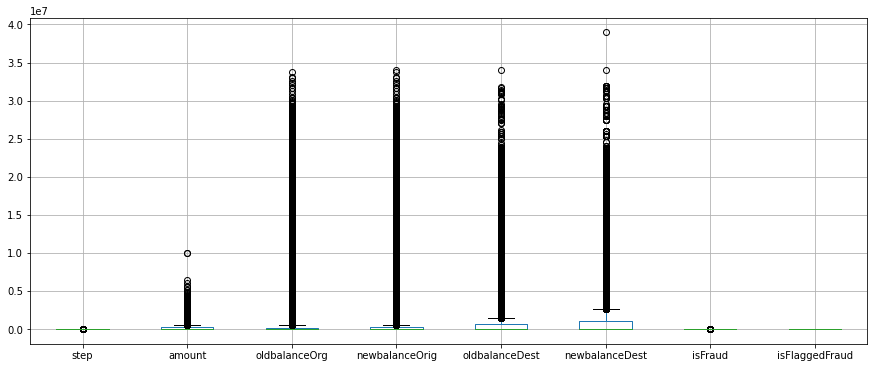

In [48]:
paysim1.boxplot(figsize=(15,6))

### What is the distribution of the outcome? 

0    99884
1      116
Name: isFraud, dtype: int64


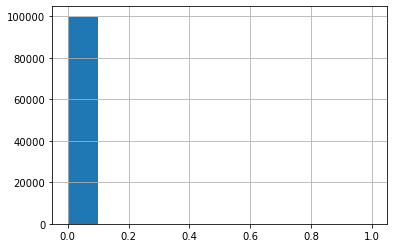

In [49]:
paysim1['isFraud'].hist()
print(paysim1['isFraud'].value_counts())

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [50]:
# First pass: 
paysim1['step'].unique()
# Each value is a bin of an hour of time. Seems appropriate

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

### Run a logisitc regression classifier and evaluate its accuracy.

In [51]:
paysim1.drop(['isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1, inplace=True)
paysim1 = pd.get_dummies(paysim1)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = paysim1.drop('isFraud', axis=1)
y = paysim1['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

model = LogisticRegression(n_jobs=-1)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Training accuracy: ', accuracy_score(y_train, y_train_pred))
print('Test accuracy: ', accuracy_score(y_test, y_test_pred))

print('Test Report: \n', classification_report(y_test, y_test_pred))

Training accuracy:  0.9989125
Test accuracy:  0.9989
Test Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       0.50      0.14      0.21        22

    accuracy                           1.00     20000
   macro avg       0.75      0.57      0.61     20000
weighted avg       1.00      1.00      1.00     20000



### Now pick a model of your choice and evaluate its accuracy.

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

model = RandomForestClassifier(n_estimators=200, max_depth=10, max_leaf_nodes=100, n_jobs=-1)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Training accuracy: ', accuracy_score(y_train, y_train_pred))
print('Test accuracy: ', accuracy_score(y_test, y_test_pred))

print('Test Report: \n', classification_report(y_test, y_test_pred))

Training accuracy:  0.9995625
Test accuracy:  0.99945
Test Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       0.92      0.55      0.69        22

    accuracy                           1.00     20000
   macro avg       0.96      0.77      0.84     20000
weighted avg       1.00      1.00      1.00     20000



### Which model worked better and how do you know?

In [54]:
# The 2nd one, is better, since what we want is to predict the minority class (isFraud=1)
# And that means what we want is a better recall

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.